<a href="https://colab.research.google.com/github/Sambhuwara/Tugas-Python/blob/main/Tugas11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
cd /content/drive/MyDrive/Colab Notebooks

/content/drive/MyDrive/Colab Notebooks


In [3]:
ls

 3scene/                    Data/           Tugas11.ipynb
'Copy of Untitled0.ipynb'   nmodel_scene/   Untitled0.ipynb


In [4]:
from keras.models import Sequential
from keras.layers.core import Activation
from keras.layers.core import Dense
from keras.layers.core import Flatten
from keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image
from imutils import paths 
import numpy as np
import os

In [5]:
print("[INFO] loading images...")
imagePaths = paths.list_images("Data")
data = []
labels = []

[INFO] loading images...


In [6]:
for i in imagePaths:
  image = Image.open(i)
  image = np.array(image.resize((64,64))) / 255.0 
  data.append(image)

  label = i.split(os.path.sep)[-2]
  labels.append(label)

In [7]:
print(labels)

['GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03',

In [8]:
lb = LabelBinarizer()
labels = lb.fit_transform(labels)

In [9]:
print(labels)

[[0 0 1 0 0]
 [0 0 1 0 0]
 [0 0 1 0 0]
 ...
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]]


In [10]:
(trainX, testX, trainY, testY) = train_test_split(np.array(data), np.array(labels), test_size=0.25)
print(trainX.shape)
print(testX.shape)

(438, 64, 64, 3)
(146, 64, 64, 3)


In [11]:
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D
from keras.layers.core import Flatten, Dense
#CNN
model = Sequential()
model.add(Convolution2D(21, (3,3), activation='relu', input_shape=(64,64,3)))
model.add(MaxPooling2D(2,2))
model.add(Convolution2D(21, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
#fully connected layer
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(5, activation='softmax'))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 21)        588       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 21)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 21)        3990      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 21)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4116)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               411700    
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 5

In [17]:
print("[INFO] training network...")
opt = Adam(lr=1e-3, decay=1e-3 / 50)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])
H = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=30, batch_size=32)

[INFO] training network...
Epoch 1/30
14/14 [==============================] - 2s 123ms/step - loss: 0.1688 - accuracy: 0.9475 - val_loss: 0.6599 - val_accuracy: 0.7329
Epoch 2/30
14/14 [==============================] - 2s 113ms/step - loss: 0.1122 - accuracy: 0.9635 - val_loss: 0.6574 - val_accuracy: 0.7534
Epoch 3/30
14/14 [==============================] - 2s 115ms/step - loss: 0.1279 - accuracy: 0.9543 - val_loss: 0.6704 - val_accuracy: 0.7603
Epoch 4/30
14/14 [==============================] - 2s 115ms/step - loss: 0.0943 - accuracy: 0.9749 - val_loss: 0.5718 - val_accuracy: 0.7808
Epoch 5/30
14/14 [==============================] - 2s 115ms/step - loss: 0.0859 - accuracy: 0.9726 - val_loss: 0.6116 - val_accuracy: 0.7671
Epoch 6/30
14/14 [==============================] - 2s 116ms/step - loss: 0.0609 - accuracy: 0.9863 - val_loss: 0.6637 - val_accuracy: 0.7534
Epoch 7/30
14/14 [==============================] - 2s 116ms/step - loss: 0.0649 - accuracy: 0.9840 - val_loss: 0.6475 - 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


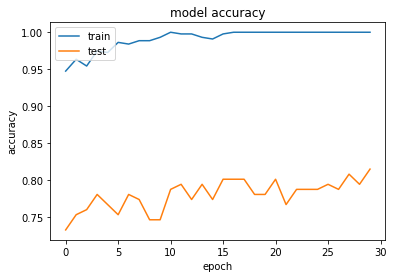

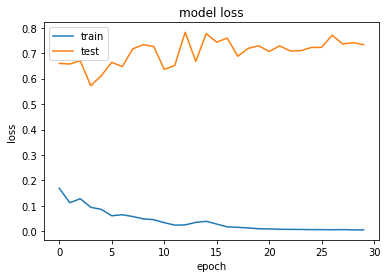

In [18]:
import matplotlib.pyplot as plt

print(H.history.keys())
#accuracy
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
#loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [19]:
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1), predictions.argmax(axis=1), target_names=lb.classes_))

[INFO] evaluating network...
              precision    recall  f1-score   support

      GMB_01       0.80      0.85      0.82        33
      GMB_02       0.75      0.70      0.72        30
      GMB_03       0.90      0.76      0.83        25
      GMB_04       0.81      0.83      0.82        35
      GMB_05       0.85      0.96      0.90        23

    accuracy                           0.82       146
   macro avg       0.82      0.82      0.82       146
weighted avg       0.82      0.82      0.81       146



In [20]:
model.save('nmodel_scene')

INFO:tensorflow:Assets written to: nmodel_scene/assets
